<a href="https://colab.research.google.com/github/AmazingGrace-D/Spam_Detection_RNN/blob/main/Spam_Detection_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding, Bidirectional
from tensorflow.keras.models import Model

In [ ]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2021-01-24 00:41:32--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2021-01-24 00:41:33 (12.4 MB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df[['v1', 'v2']]

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.columns = ['labels', 'data']

In [ ]:
df['enc_labels'] = df['labels'].map({'ham': 0, 'spam': 1})

In [ ]:
df.head()

,labels,data,enc_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
X = df['data']
y = df['enc_labels'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [ ]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequence = tokenizer.texts_to_sequences(X_test)

In [ ]:
# get word -> index mapping
word2idx = tokenizer.word_index
V = len(word2idx)

print("Found %s unique tokens." % V)

Found 7176 unique tokens.


In [ ]:
# pad sequences to get a N x T matrix

train_data = pad_sequences(train_sequences)

print('Shape of training data tensor:', train_data.shape)

# get sequence length
T = train_data.shape[1]

Shape of training data tensor: (3733, 189)


In [ ]:
test_data = pad_sequences(test_sequence, maxlen = T)
print('Shape of test data tensor:', test_data.shape)

Shape of test data tensor: (1839, 189)


In [ ]:
# Create the model

# We get to choose embedding dimensionality 
D = 20

# Hidden state dimensionality 
M = 20

# Note; we actually want to the size of the embedding to be (V + 1) x D,
# because the first index starts from 1 and not .
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [ ]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

r = model.fit(
    train_data,
    y_train,
    epochs = 10,
    validation_data = (test_data, y_test)
)

Epoch 1/10
117/117 [==============================] - 12s 80ms/step - loss: 0.5455 - accuracy: 0.8562 - val_loss: 0.4033 - val_accuracy: 0.8608
Epoch 2/10
117/117 [==============================] - 9s 75ms/step - loss: 0.3718 - accuracy: 0.8760 - val_loss: 0.3907 - val_accuracy: 0.8608
Epoch 3/10
117/117 [==============================] - 9s 78ms/step - loss: 0.3816 - accuracy: 0.8600 - val_loss: 0.3378 - val_accuracy: 0.8608
Epoch 4/10
117/117 [==============================] - 9s 78ms/step - loss: 0.2718 - accuracy: 0.8795 - val_loss: 0.1651 - val_accuracy: 0.9793
Epoch 5/10
117/117 [==============================] - 9s 80ms/step - loss: 0.1134 - accuracy: 0.9852 - val_loss: 0.1074 - val_accuracy: 0.9750
Epoch 6/10
117/117 [==============================] - 9s 77ms/step - loss: 0.0558 - accuracy: 0.9917 - val_loss: 0.0831 - val_accuracy: 0.9793
Epoch 7/10
117/117 [==============================] - 9s 76ms/step - loss: 0.0425 - accuracy: 0.9948 - val_loss: 0.0776 - val_accuracy: 0.978

<function matplotlib.pyplot.legend>

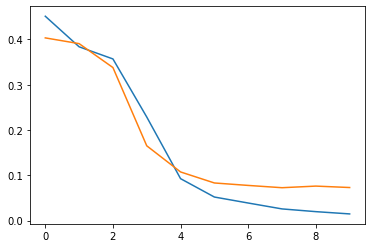

In [ ]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend

<function matplotlib.pyplot.legend>

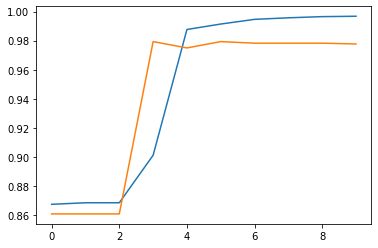

In [ ]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend

In [ ]:
# Create the model

# We get to choose embedding dimensionality 
D = 20

# Hidden state dimensionality 
M = 20

# Note; we actually want to the size of the embedding to be (V + 1) x D,
# because the first index starts from 1 and not .
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Bidirectional(LSTM(M, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [ ]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

r = model.fit(
    train_data,
    y_train,
    epochs = 10,
    validation_data = (test_data, y_test)
)

Epoch 1/10
117/117 [==============================] - 17s 114ms/step - loss: 0.5475 - accuracy: 0.8189 - val_loss: 0.3043 - val_accuracy: 0.8608
Epoch 2/10
117/117 [==============================] - 13s 109ms/step - loss: 0.1850 - accuracy: 0.9158 - val_loss: 0.0771 - val_accuracy: 0.9869
Epoch 3/10
117/117 [==============================] - 13s 109ms/step - loss: 0.0595 - accuracy: 0.9866 - val_loss: 0.0632 - val_accuracy: 0.9842
Epoch 4/10
117/117 [==============================] - 13s 108ms/step - loss: 0.0392 - accuracy: 0.9880 - val_loss: 0.0626 - val_accuracy: 0.9837
Epoch 5/10
117/117 [==============================] - 13s 111ms/step - loss: 0.0301 - accuracy: 0.9911 - val_loss: 0.0559 - val_accuracy: 0.9831
Epoch 6/10
117/117 [==============================] - 13s 113ms/step - loss: 0.0237 - accuracy: 0.9920 - val_loss: 0.0601 - val_accuracy: 0.9815
Epoch 7/10
117/117 [==============================] - 14s 119ms/step - loss: 0.0212 - accuracy: 0.9906 - val_loss: 0.0568 - val_ac

<function matplotlib.pyplot.legend>

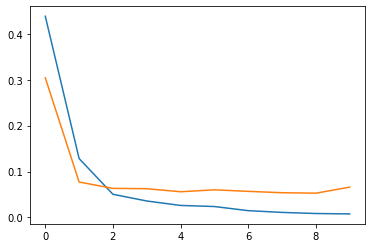

In [ ]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend

<function matplotlib.pyplot.legend>

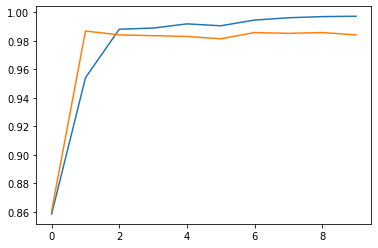

In [ ]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend

In [ ]:
sample_text = ["Buy a stock at $2.99 for on a promo date"]

pred = tokenizer.texts_to_sequences(sample_text)
pad_pred = pad_sequences(pred, maxlen = train_data.shape[1])

In [ ]:
predictions = model.predict([pad_pred])
print(predictions)

[[0.00374642]]
